In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.dates as mdates  # Import date handling
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.dates as mdates
import numpy as np
import torch
import sklearn

# Print versions
print("Package Versions:")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"numpy: {np.__version__}")
print(f"torch: {torch.__version__}")
print(f"scikit-learn: {sklearn.__version__}")


Package Versions:
pandas: 2.2.2
matplotlib: 3.9.2
numpy: 1.26.4
torch: 2.4.1+cpu
scikit-learn: 1.5.1


In [3]:
import sys
print("Python version:", sys.version)


Python version: 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:28:38) [MSC v.1929 64 bit (AMD64)]


In [4]:
!jupyter notebook --version


7.0.8


In [5]:
!conda --version


conda 24.1.2


# Load data

In [6]:
#ground-truth
df_ode_results = pd.read_excel('../data/groundtruth_compartments.xlsx')
#data from 2012-2018
daily_data_compartments = df_ode_results
start_date = '2012-01-01 00:00:00'
#start_date = '2010-01-01 00:00:00'
end_date = '2018-12-31 00:00:00'
# Filter rows for a date range (e.g., from '2012-01-01' to '2018-12-31')
data = daily_data_compartments[(daily_data_compartments['Date'] >= start_date) & (daily_data_compartments['Date'] <= end_date)]
start_Day = 0
end_Day = 2531
data = data.loc[start_Day:end_Day]

In [7]:
sequence_length = 1
train_size = 2191

In [8]:
# Load Ih prediction data (for training part) from Excel files
df_flood_train = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_train.xlsx")
df_floodIh_train = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_train.xlsx")

df_rain_train = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_train.xlsx")
df_raincases_train = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_train.xlsx")

df_floodTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")

df_rainTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_train.xlsx")
df_rainTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_train.xlsx")

df_floodrainTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_floodrainTEMP_seqlen1_oneinitcond_train.xlsx")
df_floodrainTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodrainTEMPcases_seqlen1_oneinitcond_train.xlsx")

In [9]:
# Load Ih prediction data (for testing part) from Excel files
df_flood_test = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_test.xlsx")
df_floodIh_test = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test.xlsx")
#df_floodIh_test = pd.read_excel("predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rain_test = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_test.xlsx")
df_raincases_test = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_test.xlsx")

df_floodTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_train = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_test = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rainTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_test.xlsx")
df_rainTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_test.xlsx")

df_floodrainTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_floodrainTEMP_seqlen1_oneinitcond_test.xlsx")
df_floodrainTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodrainTEMPcases_seqlen1_oneinitcond_test.xlsx")

In [10]:
#Aj Ih
df_ode_results_previous_work = pd.read_excel('../data/data.xlsx')
data_previous_work = df_ode_results_previous_work[(df_ode_results_previous_work['Date'] >= start_date) & (df_ode_results_previous_work['Date'] <= end_date)]

data_previous_work = data_previous_work.loc[start_Day:end_Day]
#data_previous_work.columns

# Plotting for training

In [11]:
df_flood_train

Date       Sh_pred    Ih_pred      Rh_pred     Sa_pred  \
0    2012-01-02  2.419438e+06  19.887810  1007.364919  600.286342   
1    2012-01-03  2.419438e+06  19.527624  1007.333934  600.330303   
2    2012-01-04  2.419439e+06  19.185585  1007.278021  600.373925   
3    2012-01-05  2.419439e+06  18.860600  1007.198308  600.417214   
4    2012-01-06  2.419439e+06  18.557989  1007.096320  600.460171   
...         ...           ...        ...          ...         ...   
2186 2017-12-27  2.419069e+06  17.048170  1378.956245  606.000410   
2187 2017-12-28  2.419070e+06  16.865199  1378.198711  606.000410   
2188 2017-12-29  2.419071e+06  16.694848  1377.429653  606.000410   
2189 2017-12-30  2.419072e+06  16.529611  1376.649800  606.000410   
2190 2017-12-31  2.419073e+06  16.369290  1375.859361  606.000410   

            Ia_pred        Ra_pred         L_pred      Ch_pred  
0     297320.766346  531652.947313  543603.292027  1560.261684  
1     297304.252989  531669.416708  543589.419813  1561.309811  
2     297287.867582  531685.758493  543575.654694  1562.351080  
3     297271.609128  531701.973658  543561.995849  1563.385493  
4     297255.476645  531718.063184  543548.442460  1564.419864  
...             ...            ...            ...          ...  
2186  295189.519701  533778.479890  541809.698222  5582.517411  
2187  295189.519700  533778.479890  541809.698221  5583.546218  
2188  295189.519699  533778.479891  541809.698221  5584.575025  
2189  295189.519699  533778.479892  541809.698220  5585.597036  
2190  295189.519698  533778.479892  541809.698220  5586.612251  

[2191 rows x 9 columns]

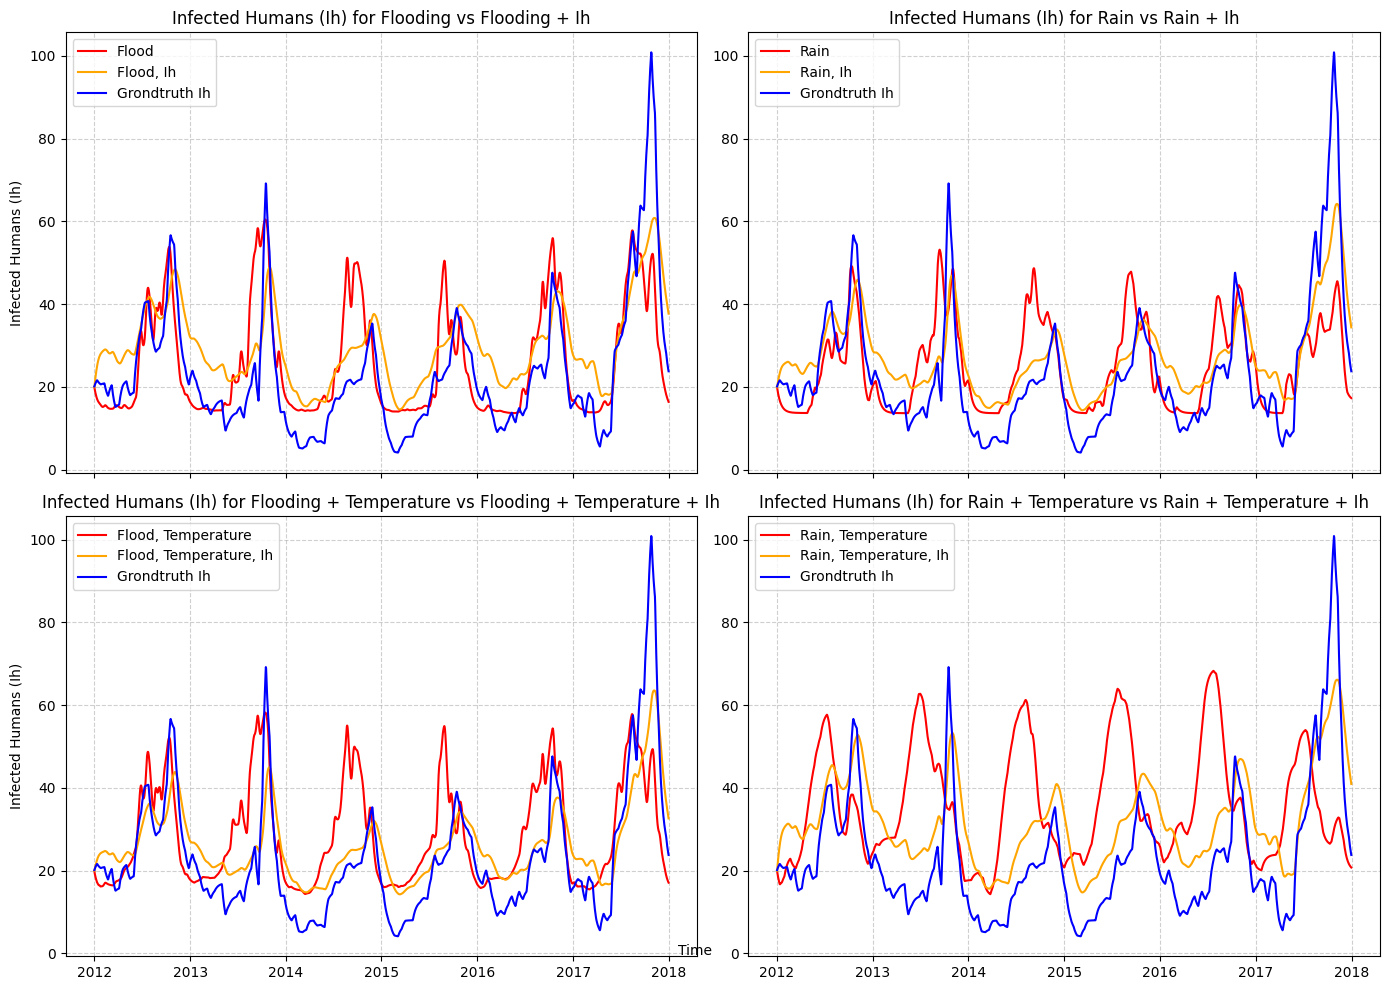

In [12]:
time_axis = df_flood_train["Date"]

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, df_flood_train["Ih_pred"], label="Flood", color="red")
axes[0, 0].plot(time_axis, df_floodIh_train["Ih_pred"], label="Flood, Ih", color='orange')
axes[0, 0].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[0, 0].set_title("Infected Humans (Ih) for Flooding vs Flooding + Ih")
axes[0, 0].set_ylabel("Infected Humans (Ih)")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, df_rain_train["Ih_pred"], label="Rain", color="red")
axes[0, 1].plot(time_axis, df_raincases_train["Ih_pred"], label="Rain, Ih", color='orange')
axes[0, 1].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[0, 1].set_title("Infected Humans (Ih) for Rain vs Rain + Ih")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temperature vs Flood + Temperature + Ih
axes[1, 0].plot(time_axis, df_floodTEMP_train["Ih_pred"], label="Flood, Temperature", color="red")
axes[1, 0].plot(time_axis, df_floodTEMPcases_train["Ih_pred"], label="Flood, Temperature, Ih", color='orange')
axes[1, 0].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[1, 0].set_title("Infected Humans (Ih) for Flooding + Temperature vs Flooding + Temperature + Ih")
axes[1, 0].set_ylabel("Infected Humans (Ih)")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temperature vs Rain + Temperature + Ih
axes[1, 1].plot(time_axis, df_rainTEMP_train["Ih_pred"], label="Rain, Temperature", color="red")
axes[1, 1].plot(time_axis, df_rainTEMPcases_train["Ih_pred"], label="Rain, Temperature, Ih", color='orange')
axes[1, 1].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[1, 1].set_title("Infected Humans (Ih) for Rain + Temperature vs Rain + Temperature + Ih")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Set common x-axis label
fig.text(0.5, 0.04, "Time", ha="center")

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("../results/predicted_Ih_plot_1stmodel_factorsIh_train.png", dpi=300)
plt.show()


In [13]:
#error metrics
def compute_error_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
    rmse = np.sqrt(mse)
    nrmse = rmse / (np.max(y_true) - np.min(y_true))
    rel = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "MSE": mse,
        "MAE": mae,
        "MAPE (%)": mape,
        "SMAPE (%)": smape,
        "RMSE": rmse,
        "NRMSE": nrmse,
        "REL (%)": rel
    }


In [14]:
y_groundtruth = data["Ih"][sequence_length:sequence_length+train_size].values  # Groundtruth Ih (training period)


In [15]:
scenarios = {
    "Flood": df_flood_train["Ih_pred"].values,
    "Flood + Ih": df_floodIh_train["Ih_pred"].values,
    "Rain": df_rain_train["Ih_pred"].values,
    "Rain + Ih": df_raincases_train["Ih_pred"].values,
    "Flood + Temp": df_floodTEMP_train["Ih_pred"].values,
    "Flood + Temp + Ih": df_floodTEMPcases_train["Ih_pred"].values,
    "Rain + Temp": df_rainTEMP_train["Ih_pred"].values,
    "Rain + Temp + Ih": df_rainTEMPcases_train["Ih_pred"].values,
    "Flood + Rain + Temp": df_floodrainTEMP_train["Ih_pred"].values,
    "Flood + Rain + Temp + Ih": df_floodrainTEMPcases_train["Ih_pred"].values,
    "Previous work": data_previous_work["Ih"][sequence_length:sequence_length+train_size].values,
}


In [17]:
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame()

for label, y_pred in scenarios.items():
    metrics = compute_error_metrics(y_groundtruth, y_pred)
    metrics_df[label] = pd.Series(metrics)

# Transpose for readability
metrics_df = metrics_df.T

# Save to Excel or CSV
metrics_df.to_excel("../results/Ih_prediction_metrics_train.xlsx")

# Display metrics
print(metrics_df)


                                 MSE        MAE    MAPE (%)  SMAPE (%)  \
Flood                     130.340704   7.881462   44.316193  33.736868   
Flood + Ih                103.148771   8.959474   59.661453  41.437621   
Rain                      147.235843   8.605450   47.349854  36.638484   
Rain + Ih                  75.058878   7.267923   48.971932  35.212057   
Flood + Temp              177.706875   9.963753   60.896023  41.532987   
Flood + Temp + Ih          70.448886   6.732974   44.824863  32.827281   
Rain + Temp               567.637335  18.755710  122.535439  63.228863   
Rain + Temp + Ih          130.541304  10.522925   69.212807  46.615303   
Flood + Rain + Temp       415.309688  15.790482   95.376512  55.884394   
Flood + Rain + Temp + Ih  169.704517  12.170151   78.658191  51.490119   
Previous work             131.836026   7.938962   44.658348  34.001678   

                               RMSE     NRMSE     REL (%)  
Flood                     11.416685  0.118039   44.

# Plotting for testing

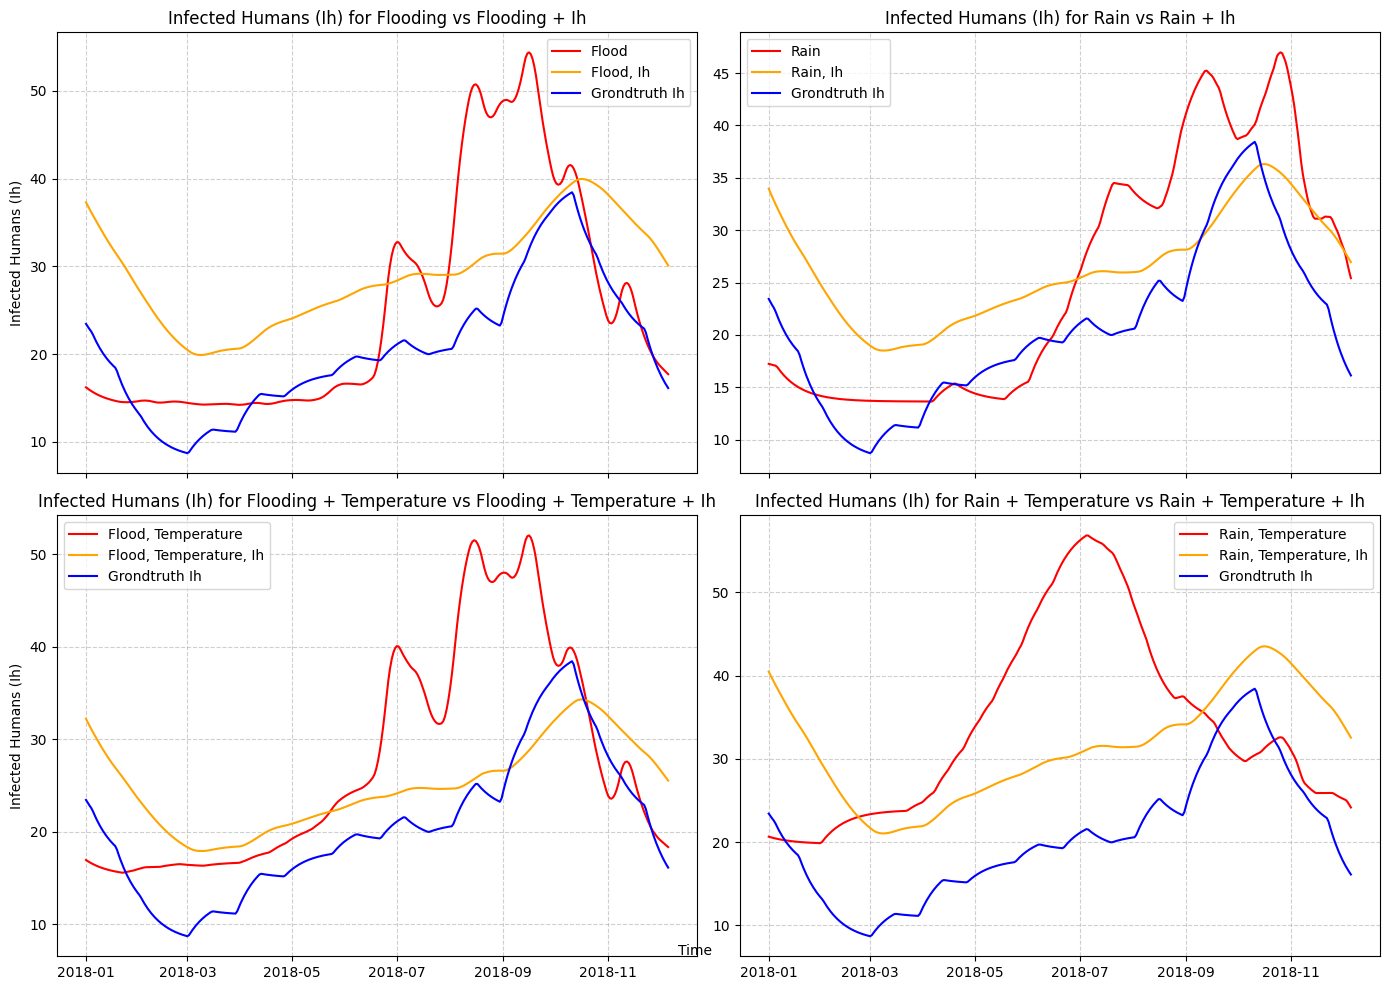

In [18]:
#use init cond
time_axis = df_flood_test["Date"]

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, df_flood_test["Ih_pred"], label="Flood", color="red")
axes[0, 0].plot(time_axis, df_floodIh_test["Ih_pred"], label="Flood, Ih", color='orange')
axes[0, 0].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[0, 0].set_title("Infected Humans (Ih) for Flooding vs Flooding + Ih")
axes[0, 0].set_ylabel("Infected Humans (Ih)")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, df_rain_test["Ih_pred"], label="Rain", color="red")
axes[0, 1].plot(time_axis, df_raincases_test["Ih_pred"], label="Rain, Ih", color='orange')
axes[0, 1].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[0, 1].set_title("Infected Humans (Ih) for Rain vs Rain + Ih")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temperature vs Flood + Temperature + Ih
axes[1, 0].plot(time_axis, df_floodTEMP_test["Ih_pred"], label="Flood, Temperature", color="red")
axes[1, 0].plot(time_axis, df_floodTEMPcases_test["Ih_pred"], label="Flood, Temperature, Ih", color='orange')
axes[1, 0].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[1, 0].set_title("Infected Humans (Ih) for Flooding + Temperature vs Flooding + Temperature + Ih")
axes[1, 0].set_ylabel("Infected Humans (Ih)")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temperature vs Rain + Temperature + Ih
axes[1, 1].plot(time_axis, df_rainTEMP_test["Ih_pred"], label="Rain, Temperature", color="red")
axes[1, 1].plot(time_axis, df_rainTEMPcases_test["Ih_pred"], label="Rain, Temperature, Ih", color='orange')
axes[1, 1].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[1, 1].set_title("Infected Humans (Ih) for Rain + Temperature vs Rain + Temperature + Ih")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Set common x-axis label
fig.text(0.5, 0.04, "Time", ha="center")

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("../results/predicted_Ih_plot_1stmodel_factorsIh_test.png", dpi=300)
plt.show()


In [19]:
y_groundtruth = data["Ih"][sequence_length+train_size:].values  # Groundtruth Ih (testing period)

In [20]:
scenarios = {
    "Flood": df_flood_test["Ih_pred"].values,
    "Flood + Ih": df_floodIh_test["Ih_pred"].values,
    "Rain": df_rain_test["Ih_pred"].values,
    "Rain + Ih": df_raincases_test["Ih_pred"].values,
    "Flood + Temp": df_floodTEMP_test["Ih_pred"].values,
    "Flood + Temp + Ih": df_floodTEMPcases_test["Ih_pred"].values,
    "Rain + Temp": df_rainTEMP_test["Ih_pred"].values,
    "Rain + Temp + Ih": df_rainTEMPcases_test["Ih_pred"].values,
    "Flood + Rain + Temp": df_floodrainTEMP_test["Ih_pred"].values,
    "Flood + Rain + Temp + Ih": df_floodrainTEMPcases_test["Ih_pred"].values,
    "Previous work": data_previous_work["Ih"].values[sequence_length+train_size:],
}


# Table 4

In [21]:
#with init cond for testing period (updated with two models)
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame()

for label, y_pred in scenarios.items():
    metrics = compute_error_metrics(y_groundtruth, y_pred)
    metrics_df[label] = pd.Series(metrics)

# Transpose for readability
metrics_df = metrics_df.T

# Save to Excel or CSV
#metrics_df.to_excel("../results/Ih_prediction_metrics_test_useinitcond.xlsx")

# Display metrics
print(metrics_df)


                                 MSE        MAE   MAPE (%)  SMAPE (%)  \
Flood                      92.081960   6.344180  30.362669  24.668992   
Flood + Ih                 85.855329   8.584267  52.334156  38.836711   
Rain                       61.063753   6.085517  29.130479  24.718549   
Rain + Ih                  47.160448   6.199332  39.132213  30.387059   
Flood + Temp              116.357866   7.899420  40.542482  31.288369   
Flood + Temp + Ih          35.411264   5.317658  33.837158  26.876433   
Rain + Temp               325.045871  14.452991  83.341660  52.431796   
Rain + Temp + Ih          130.721868  10.936036  64.203003  46.069058   
Flood + Rain + Temp       269.992018  12.241851  60.657770  42.038656   
Flood + Rain + Temp + Ih  183.052091  13.114790  75.436609  52.281082   
Previous work              91.785423   6.318918  30.467564  24.688475   

                               RMSE     NRMSE    REL (%)  
Flood                      9.595935  0.322850  30.362669  
Flood

In [17]:
#with init cond for testing period
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame()

for label, y_pred in scenarios.items():
    metrics = compute_error_metrics(y_groundtruth, y_pred)
    metrics_df[label] = pd.Series(metrics)

# Transpose for readability
metrics_df = metrics_df.T

# Save to Excel or CSV
#metrics_df.to_excel("../results/Ih_prediction_metrics_test_useinitcond.xlsx")

# Display metrics
print(metrics_df)


                          MSE        MAE   MAPE (%)  SMAPE (%)       RMSE  \
Flood               92.081960   6.344180  30.362669  24.668992   9.595935   
Flood + Ih          85.855329   8.584267  52.334156  38.836711   9.265815   
Rain                61.063753   6.085517  29.130479  24.718549   7.814330   
Rain + Ih           47.160448   6.199332  39.132213  30.387059   6.867347   
Flood + Temp       116.357866   7.899420  40.542482  31.288369  10.786930   
Flood + Temp + Ih   35.411264   5.317658  33.837158  26.876433   5.950736   
Rain + Temp        325.045871  14.452991  83.341660  52.431796  18.029029   
Rain + Temp + Ih   130.721868  10.936036  64.203003  46.069058  11.433366   
Previous work       91.785423   6.318918  30.467564  24.688475   9.580471   

                      NRMSE    REL (%)  
Flood              0.322850  30.362669  
Flood + Ih         0.311743  52.334156  
Rain               0.262909  29.130479  
Rain + Ih          0.231048  39.132213  
Flood + Temp       0.362

In [22]:
metrics_df.T.to_excel("../results/Ih_prediction_metrics_test_useinitcond_transposed.xlsx")

In [45]:

df_floodTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test.xlsx")

# --- existing arrays ---
y_groundtruth_tr = data["Ih"][sequence_length:sequence_length+train_size].values
y_groundtruth_te = data["Ih"][sequence_length+train_size:].values

y_pred_train = df_floodTEMPcases_train["Ih_pred"].values
y_pred_test  = df_floodTEMPcases_test["Ih_pred"].values

# Choose significance level and window size
alpha = 0.05        # 95% interval
window_size = 50    # residual calibration window

In [46]:
time_axis_all = pd.concat([df_flood_train["Date"], df_flood_test["Date"]]).reset_index(drop=True)


In [47]:
#all
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_true_all = np.concatenate([y_groundtruth_tr, y_groundtruth_te])

In [48]:
# Define the time range
start_Day = 0
end_Day = 2531
df_ode_results = pd.read_excel('../data/data.xlsx')
Ih_previous_study = df_ode_results.loc[start_Day+sequence_length:end_Day, "Ih"]


In [49]:
df_betaHL_pred = pd.read_csv("../results/predicted_betaHL_1stmodel_floodTEMPcases_seqlen1_estimate.csv")
df_covariates = pd.read_excel("../data/covariates_date.xlsx")
# Extract β_hL data
time_axis = df_covariates["Date"][start_Day:end_Day]  # Common time axis
betaHL_pred = df_betaHL_pred.iloc[:, 1]  # Assuming second column has β_hL predictions
betaHL_existing = df_covariates["betaHL"][start_Day:end_Day].values  # Existing known β_hL

In [50]:
# Load β_{hL} for rain-only model
df_rain_betaHL_train = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_train.csv")
df_rain_betaHL_test = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_test.csv")
df_betaHL_rain = pd.concat([df_rain_betaHL_train, df_rain_betaHL_test], ignore_index=True)
betaHL_rain = df_betaHL_rain.iloc[:, 1].values  # Assuming β_{hL} is in the second column

# Load predicted Ih for rain-only model
df_rain_pred_train = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_train.xlsx")
df_rain_pred_test = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_test.xlsx")
y_pred_rain_train = df_rain_pred_train["Ih_pred"].values
y_pred_rain_test = df_rain_pred_test["Ih_pred"].values
y_pred_rain_all = np.concatenate([y_pred_rain_train, y_pred_rain_test])

# Figure 4

In [51]:
import numpy as np

def _q_higher(x, tau):
    """Finite-sample corrected empirical quantile with 'higher' interpolation."""
    # tau is already corrected outside; keep guard for old NumPy
    try:
        return np.quantile(x, tau, method="higher")
    except TypeError:
        return np.quantile(x, tau, interpolation="higher")



In [52]:
import numpy as np

def spci_intervals(y_pred, y_true, alpha=0.05, window=50, init_scores=None,
                   adapt=False, eta0=0.0, lr=0.05):
    """
    Sequential predictive conformal intervals (past-only) with finite-sample correction.
    - Uses absolute residuals from PAST only (rolling window of size `window`).
    - Quantile computed via order statistic: k = ceil((m+1)*(1-alpha)), then q = sorted_scores[k-1].
    - Optional adaptive widening `eta` for coverage control (off by default).
    Returns: lower, upper, scores (np.arrays/lists)
    """
    lower, upper = [], []
    scores = [] if init_scores is None else list(init_scores)
    eta = eta0

    for t in range(len(y_pred)):
        m = len(scores)

        if m == 0:
            q = np.inf
        else:
            # finite-sample corrected order statistic (1-indexed), clipped to m
            k = int(np.ceil((m + 1) * (1 - alpha)))
            k = min(max(k, 1), m)
            s = np.sort(np.asarray(scores))
            q = s[k - 1]  # kth smallest (equivalent to 'higher' quantile version)

        lo = max(y_pred[t] - (q + eta), 0.0)   # truncate for nonnegative counts
        hi = y_pred[t] + (q + eta)
        lower.append(lo); upper.append(hi)

        # observe outcome, update scores and window
        r_t = abs(y_true[t] - y_pred[t])
        scores.append(r_t)
        if len(scores) > window:
            scores = scores[-window:]

        if adapt:
            covered = (y_true[t] >= lo) and (y_true[t] <= hi)
            eta += lr * ((1 - alpha) - float(covered))
            eta = max(0.0, eta)  # keep nonnegative widening

    return np.array(lower), np.array(upper), scores


In [53]:


# 1) TRAIN intervals (sequential within train)
lb_train_spci, ub_train_spci, train_scores = spci_intervals(
    y_pred=y_pred_train,
    y_true=y_groundtruth_tr,
    alpha=alpha,
    window=window_size
)

# 2) TEST intervals (seed with last 'window_size' train residuals)
seed_scores = train_scores[-window_size:] if len(train_scores) >= window_size else train_scores
lb_test_spci, ub_test_spci, _ = spci_intervals(
    y_pred=y_pred_test,
    y_true=y_groundtruth_te,
    alpha=alpha,
    window=window_size,
    init_scores=seed_scores
)

# 3) ALL (train+test) sequential intervals in one pass (sometimes handy for plotting)
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_true_all = np.concatenate([y_groundtruth_tr, y_groundtruth_te])

lb_all_spci, ub_all_spci, _ = spci_intervals(
    y_pred=y_pred_all,
    y_true=y_true_all,
    alpha=alpha,
    window=window_size
)

# --- Rain-only model bands using the same SPCI ---
y_pred_rain_train = df_rain_pred_train["Ih_pred"].values
y_pred_rain_test  = df_rain_pred_test["Ih_pred"].values
y_pred_rain_all   = np.concatenate([y_pred_rain_train, y_pred_rain_test])

# train → test seeding for rain-only as well
_, _, train_scores_rain = spci_intervals(y_pred_rain_train, y_groundtruth_tr, alpha=alpha, window=window_size)
seed_rain = train_scores_rain[-window_size:] if len(train_scores_rain) >= window_size else train_scores_rain
lb_rain_all_spci, ub_rain_all_spci, _ = spci_intervals(y_pred_rain_all, y_true_all, alpha=alpha, window=window_size)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


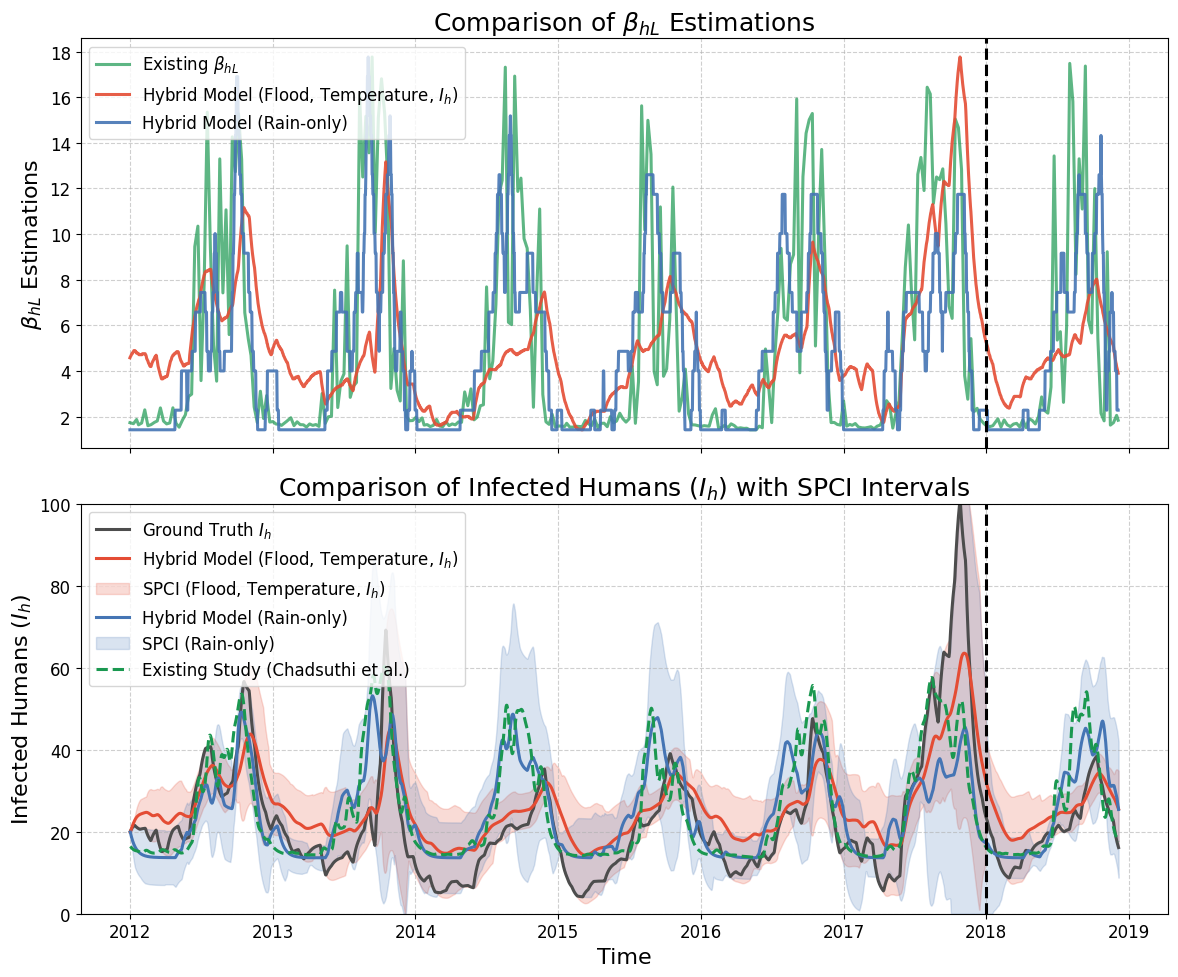

In [54]:
# --- Plot with SPCI intervals ---

# Global font and line settings
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2.2
})

# Helper: first index where both bounds are finite
def _first_finite(lb, ub):
    finite = np.isfinite(lb) & np.isfinite(ub)
    return int(np.argmax(finite)) if finite.any() else len(lb)

# Indices where SPCI bands start to be valid
start_all  = _first_finite(lb_all_spci,  ub_all_spci)
start_rain = _first_finite(lb_rain_all_spci, ub_rain_all_spci)

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Subplot 1: β_hL Comparison
axes[0].plot(time_axis, betaHL_existing, label=r"Existing $\beta_{hL}$", color="#1A9850", alpha=0.7)
axes[0].plot(time_axis, betaHL_pred,     label=r"Hybrid Model (Flood, Temperature, $I_h$)", color='#E44C34', alpha=0.9)
axes[0].plot(time_axis, betaHL_rain,     label=r"Hybrid Model (Rain-only)", color='#4575B4', alpha=0.9)
axes[0].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")
axes[0].set_ylabel(r"$\beta_{hL}$ Estimations")
axes[0].set_title(r"Comparison of $\beta_{hL}$ Estimations")
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle="--", alpha=0.6)

# --- Subplot 2: Infected Humans (Ih) with SPCI intervals
axes[1].plot(time_axis_all, y_true_all, label='Ground Truth $I_h$', color="#4d4d4d")

# Hybrid model prediction + SPCI
axes[1].plot(time_axis_all, y_pred_all, label='Hybrid Model (Flood, Temperature, $I_h$)', color='#E44C34')
if start_all < len(time_axis_all):
    axes[1].fill_between(time_axis_all[start_all:],
                         lb_all_spci[start_all:], ub_all_spci[start_all:],
                         color='#E44C34', alpha=0.2, label='SPCI (Flood, Temperature, $I_h$)')

# Rain-only prediction + SPCI
axes[1].plot(time_axis_all, y_pred_rain_all, label='Hybrid Model (Rain-only)', color='#4575B4')
if start_rain < len(time_axis_all):
    axes[1].fill_between(time_axis_all[start_rain:],
                         lb_rain_all_spci[start_rain:], ub_rain_all_spci[start_rain:],
                         color='#4575B4', alpha=0.2, label='SPCI (Rain-only)')

# Existing study
axes[1].plot(time_axis_all, Ih_previous_study, label="Existing Study (Chadsuthi et al.)",
             color="#1A9850", linestyle="--")

# Train-test split
axes[1].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")

# Formatting
axes[1].set_ylabel("Infected Humans ($I_h$)")
axes[1].set_xlabel("Time")
axes[1].set_title("Comparison of Infected Humans ($I_h$) with SPCI Intervals")
axes[1].set_ylim(0, 100)
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()

# Save in multiple high-resolution formats (new suffix: _spci)
for ext in ['png', 'svg', 'eps', 'tiff', 'pdf']:
    plt.savefig(f"../figures/predicted_plot_PEmodel_hybrid_rain_compare_conformal_spci_.{ext}",
                dpi=300, bbox_inches='tight')

plt.show()
